In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import geo_tools, nc_tools, tidetools
import xarray as xr
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [2]:
import scipy.signal as signal

In [3]:
import glob

In [4]:
nowcast = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV17-02')

In [5]:
bathy = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

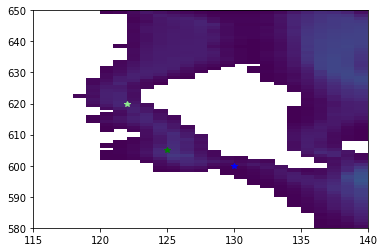

In [17]:
plt.pcolormesh(bathy.variables['Bathymetry'][:])
plt.ylim(580,650)
plt.xlim(115,140)
plt.plot(130, 600, 'b*')
plt.plot(125, 605, 'g*')
plt.plot(122, 620, '*', color='lightgreen')

(100, 150)

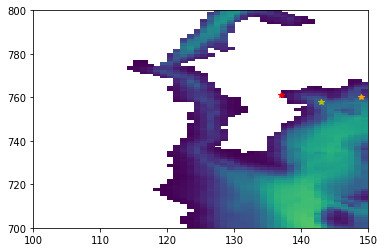

In [6]:
plt.pcolormesh(bathy.variables['Bathymetry'][:])
plt.plot(137, 761, 'r*')
plt.plot(143, 758, 'y*')
plt.plot(149, 760, '*', color='orange')
plt.ylim(700,800)
plt.xlim(100,150)

In [6]:
atmos_grid = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1')
winds_data = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')
bathy = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
nemo_lon = bathy.variables['nav_lon'][:]
nemo_lat = bathy.variables['nav_lat'][:]

In [7]:
N = 1
Wn = 1/24
B, A = signal.butter(N,Wn)
from salishsea_tools import viz_tools

In [31]:
jan0717 = sorted(glob
                 .glob('/ocean/vdo/MEOPAR/completed-runs/salinityanomilies/07jan16*/SalishSea*1h*grid_T*'))

In [32]:
with nc_tools.scDataset(jan0717) as f:
    bs1 = f.variables['vosaline'][:,0,600,130]
    print('bs1 is done')
    bs2 = f.variables['vosaline'][:,0,605,125]
    print('bs2 is done')
    bs3 = f.variables['vosaline'][:,0,620,122]
    print('bs3 is done')
    q1 = f.variables['vosaline'][:,0,761,137]
    print('q1 is done')
    q2 = f.variables['vosaline'][:,0,758,143]
    print('q2 is done')
    q3 = f.variables['vosaline'][:,0,760,149]
    print('q3 is done')
    times = f.variables['time_counter'][:]
    print('time is done')

bs1 is done
bs2 is done
bs3 is done
q1 is done
q2 is done
q3 is done
time is done


In [28]:
test = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/salinityanomilies/07jan16a/SalishSea_1h_20160107_20160116_grid_T.nc')

In [29]:
test.variables['time_counter'].units

'seconds since 1900-01-01 00:00:00'

1 loop, best of 1: 6.65 s per loop


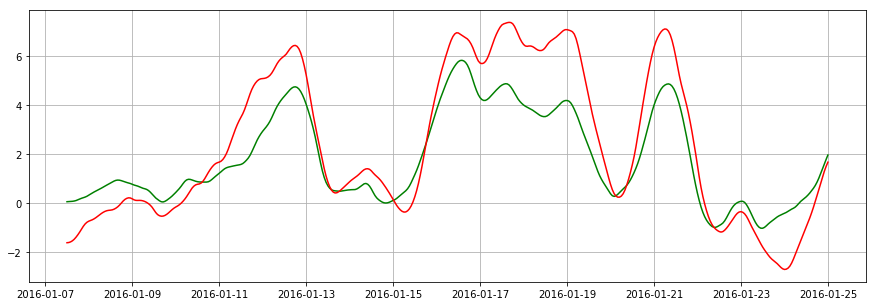

In [8]:
%%timeit -n1 -r1
fig, ax = plt.subplots(figsize=(15,5))
time_slice = slice('2016-01-07 12:00:00', '2016-01-25 00:00:00')
u_wind_ts = (winds_data.u_wind
                 .isel(gridY=163, gridX=109)
                 .sel(time=time_slice))
v_wind_ts = (winds_data.v_wind
                 .isel(gridY=163, gridX=109)
                 .sel(time=time_slice))
rotated_u_winds, rotated_v_winds = viz_tools.rotate_vel(u_wind_ts.values, 
                                                       v_wind_ts.values, origin = 'map' )
windfu = signal.filtfilt(B,A, rotated_u_winds)
windfv = signal.filtfilt(B,A,rotated_v_winds)
ax.plot(winds_data.time.sel(time=time_slice), windfv, 'g-')
u_wind_ts = (winds_data.u_wind
                 .isel(gridY=194, gridX=104)
                 .sel(time=time_slice))
v_wind_ts = (winds_data.v_wind
                 .isel(gridY=194, gridX=104)
                 .sel(time=time_slice))
rotated_u_winds, rotated_v_winds = viz_tools.rotate_vel(u_wind_ts.values, 
                                                       v_wind_ts.values, origin = 'map' )
windfu = signal.filtfilt(B,A, rotated_u_winds)
windfv = signal.filtfilt(B,A,rotated_v_winds)
ax.plot(winds_data.time.sel(time=time_slice), windfv, 'r-')
ax.grid('on')

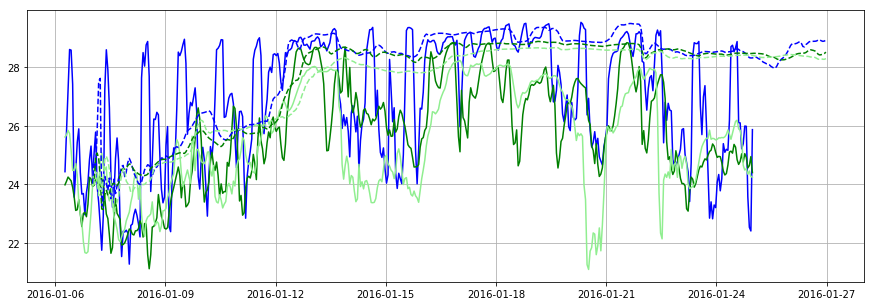

In [39]:
fig, ax = plt.subplots(figsize = (15,5))
dates = nc.num2date(nowcast.variables['time'][11550:12000], nowcast.variables['time'].units)
ax.plot(dates, nowcast.variables['salinity'][11550:12000, 0, 600, 130], 'b-')
ax.plot(dates, nowcast.variables['salinity'][11550:12000, 0, 605, 125], 'g-')
ax.plot(dates, nowcast.variables['salinity'][11550:12000, 0, 620, 122], color='lightgreen')
dates = nc.num2date(times, 'seconds since 1900-01-01 00:00:00')
ax.plot(dates, bs1, 'b--')
ax.plot(dates, bs2, 'g--')
ax.plot(dates, bs3, '--', color='lightgreen')
ax.grid('on')

In [8]:
oct1414 = sorted(glob.glob('/ocean/vdo/MEOPAR/completed-runs/salinityanomilies/14oct14*/SalishSea*1h*grid_T*'))

In [9]:
with nc_tools.scDataset(oct1414) as f:
    bs1 = f.variables['vosaline'][:,0,600,130]
    print('bs1 is done')
    bs2 = f.variables['vosaline'][:,0,605,125]
    print('bs2 is done')
    bs3 = f.variables['vosaline'][:,0,620,122]
    print('bs3 is done')
    q1 = f.variables['vosaline'][:,0,761,137]
    print('q1 is done')
    q2 = f.variables['vosaline'][:,0,758,143]
    print('q2 is done')
    q3 = f.variables['vosaline'][:,0,760,149]
    print('q3 is done')
    times = f.variables['time_counter'][:]
    print('time is done')

bs1 is done
bs2 is done
bs3 is done
q1 is done
q2 is done
q3 is done
time is done


In [13]:
dec0314 = sorted(glob.glob('/ocean/vdo/MEOPAR/completed-runs/salinityanomilies/03dec14*/*1h*grid_T*'))

In [14]:
with nc_tools.scDataset(dec0314) as f:
    bs1 = f.variables['vosaline'][:,0,600,130]
    print('bs1 is done')
    bs2 = f.variables['vosaline'][:,0,605,125]
    print('bs2 is done')
    bs3 = f.variables['vosaline'][:,0,620,122]
    print('bs3 is done')
    q1 = f.variables['vosaline'][:,0,761,137]
    print('q1 is done')
    q2 = f.variables['vosaline'][:,0,758,143]
    print('q2 is done')
    q3 = f.variables['vosaline'][:,0,760,149]
    print('q3 is done')
    times = f.variables['time_counter'][:]
    print('time is done')

bs1 is done
bs2 is done
bs3 is done
q1 is done
q2 is done
q3 is done
time is done


1 loop, best of 1: 4.89 s per loop


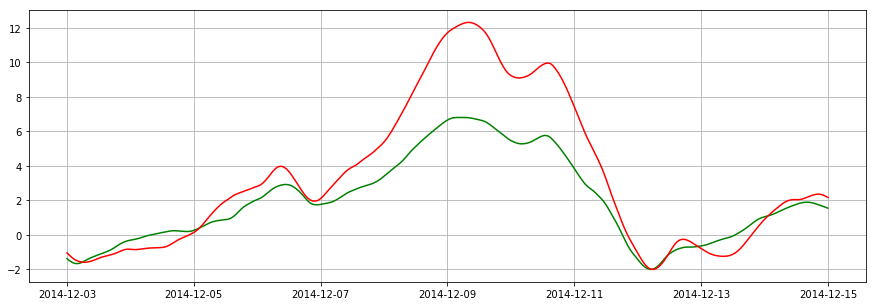

In [33]:
%%timeit -n1 -r1
fig, ax = plt.subplots(figsize=(15,5))
time_slice = slice('2014-12-03 0:00:00', '2014-12-15 00:00:00')
u_wind_ts = (winds_data.u_wind
                 .isel(gridY=163, gridX=109)
                 .sel(time=time_slice))
v_wind_ts = (winds_data.v_wind
                 .isel(gridY=163, gridX=109)
                 .sel(time=time_slice))
rotated_u_winds, rotated_v_winds = viz_tools.rotate_vel(u_wind_ts.values, 
                                                       v_wind_ts.values, origin = 'map' )
windfu = signal.filtfilt(B,A, rotated_u_winds)
windfv = signal.filtfilt(B,A,rotated_v_winds)
ax.plot(winds_data.time.sel(time=time_slice), windfv, 'g-')
u_wind_ts = (winds_data.u_wind
                 .isel(gridY=194, gridX=104)
                 .sel(time=time_slice))
v_wind_ts = (winds_data.v_wind
                 .isel(gridY=194, gridX=104)
                 .sel(time=time_slice))
rotated_u_winds, rotated_v_winds = viz_tools.rotate_vel(u_wind_ts.values, 
                                                       v_wind_ts.values, origin = 'map' )
windfu = signal.filtfilt(B,A, rotated_u_winds)
windfv = signal.filtfilt(B,A,rotated_v_winds)
ax.plot(winds_data.time.sel(time=time_slice), windfv, 'r-')
ax.grid('on')

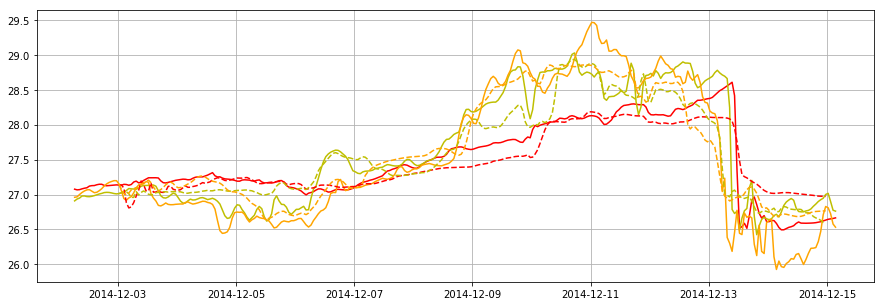

In [30]:
fig, ax = plt.subplots(figsize = (15,5))
dates = nc.num2date(nowcast.variables['time'][1950:2260], nowcast.variables['time'].units)
ax.plot(dates, nowcast.variables['salinity'][1950:2260, 0, 761, 137], 'r-')
ax.plot(dates, nowcast.variables['salinity'][1950:2260, 0, 758, 143], 'y-')
ax.plot(dates, nowcast.variables['salinity'][1950:2260, 0, 760, 149], '-', color= 'orange')
dates = nc.num2date(times, 'seconds since 1900-01-01 00:00:00')
ax.plot(dates, q1, 'r--')
ax.plot(dates, q2, 'y--')
ax.plot(dates, q3, '--', color= 'orange')
ax.grid('on')

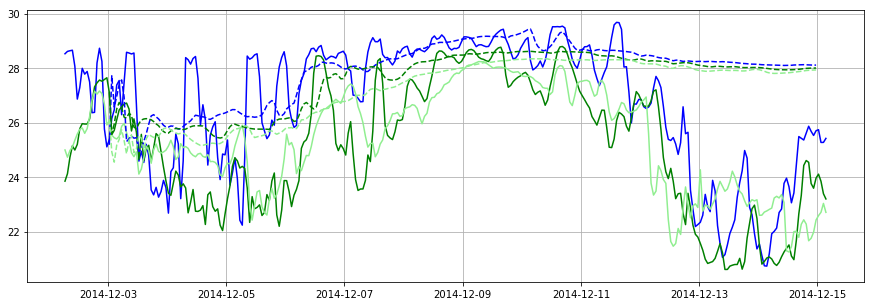

In [31]:
fig, ax = plt.subplots(figsize = (15,5))
dates = nc.num2date(nowcast.variables['time'][1950:2260], nowcast.variables['time'].units)
ax.plot(dates, nowcast.variables['salinity'][1950:2260, 0, 600, 130], 'b-')
ax.plot(dates, nowcast.variables['salinity'][1950:2260, 0, 605, 125], 'g-')
ax.plot(dates, nowcast.variables['salinity'][1950:2260, 0, 620, 122], color='lightgreen')
dates = nc.num2date(times, 'seconds since 1900-01-01 00:00:00')
ax.plot(dates, bs1, 'b--')
ax.plot(dates, bs2, 'g--')
ax.plot(dates, bs3, '--', color='lightgreen')
ax.grid('on')

In [74]:
dec2315 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/salinityanomilies/23dec15/SalishSea_1h_20151223_20151230_grid_T.nc')

1 loop, best of 1: 2.45 s per loop


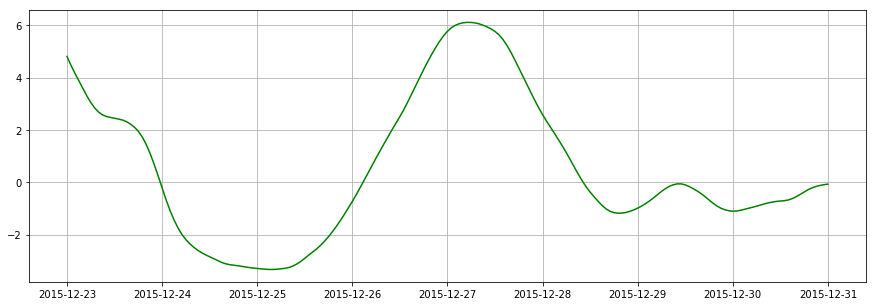

In [75]:
%%timeit -n1 -r1
fig, ax = plt.subplots(figsize=(15,5))
time_slice = slice('2015-12-23 0:00:00', '2015-12-31 00:00:00')
u_wind_ts = (winds_data.u_wind
                 .isel(gridY=163, gridX=109)
                 .sel(time=time_slice))
v_wind_ts = (winds_data.v_wind
                 .isel(gridY=163, gridX=109)
                 .sel(time=time_slice))
rotated_u_winds, rotated_v_winds = viz_tools.rotate_vel(u_wind_ts.values, 
                                                       v_wind_ts.values, origin = 'map' )
windfu = signal.filtfilt(B,A, rotated_u_winds)
windfv = signal.filtfilt(B,A,rotated_v_winds)
ax.plot(winds_data.time.sel(time=time_slice), windfv, 'g-')
ax.grid('on')

In [83]:
nc.num2date(nowcast.variables['time'][11400], nowcast.variables['time'].units)

datetime.datetime(2015, 12, 31, 0, 30)

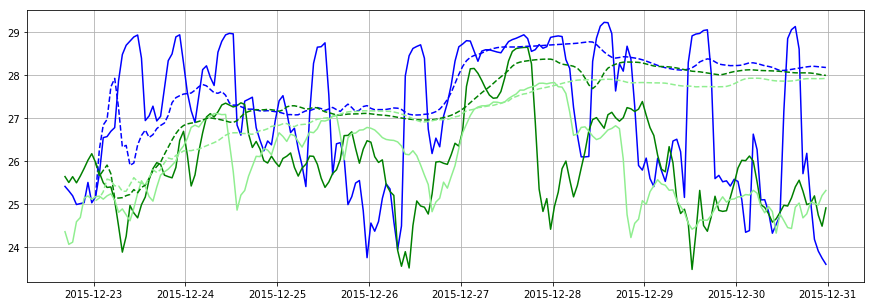

In [84]:
fig, ax = plt.subplots(figsize = (15,5))
dates = nc.num2date(nowcast.variables['time'][11200:11400], nowcast.variables['time'].units)
ax.plot(dates, nowcast.variables['salinity'][11200:11400, 0, 600, 130], 'b-')
ax.plot(dates, nowcast.variables['salinity'][11200:11400, 0, 605, 125], 'g-')
ax.plot(dates, nowcast.variables['salinity'][11200:11400, 0, 620, 122], color='lightgreen')
dates = nc.num2date(dec2315.variables['time_counter'][:], 'seconds since 1900-01-01 00:00:00')
ax.plot(dates, dec2315.variables['vosaline'][:,0,600,130], 'b--')
ax.plot(dates, dec2315.variables['vosaline'][:,0,605,125], 'g--')
ax.plot(dates, dec2315.variables['vosaline'][:,0,620,122], '--', color='lightgreen')
ax.grid('on')